In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
books = pd.read_csv("F:/bestsellers with categories.csv")

In [3]:
books.shape

(550, 7)

In [4]:
books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [8]:
books['Author'].value_counts().head(5)

Jeff Kinney                           12
Gary Chapman                          11
Suzanne Collins                       11
Rick Riordan                          11
American Psychological Association    10
Name: Author, dtype: int64

We can positively confirm that Jeff Kinney has authored the most number of books during this period as per the data.

In [11]:
books['Genre'].value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

So, the non-fiction category leads the fiction category here.

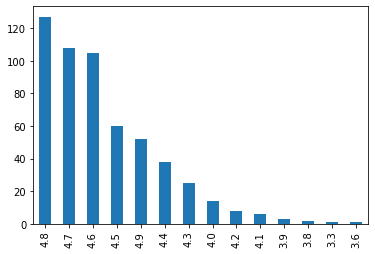

In [19]:
books['User Rating'].value_counts().plot(kind = 'bar')
plt.show()

We can clearly see that the books will the highest ratings has the highest number of them.


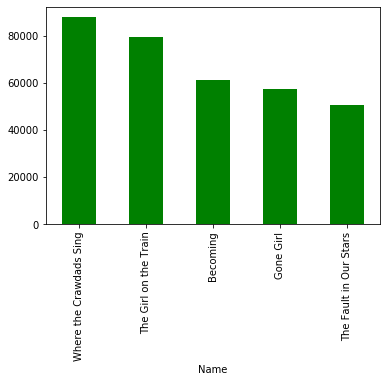

In [45]:
books.groupby(['Name'])['Reviews'].max().sort_values(ascending = False).head().plot(kind = 'bar', color = 'g')
plt.show()

Here we can say that the book "Where the Crawdads Sing" has the highest number of reviews.

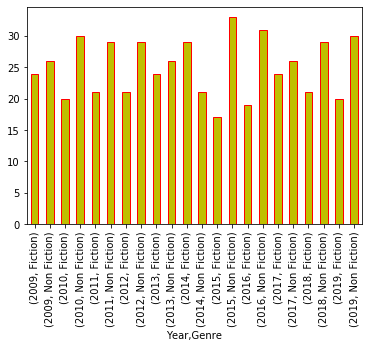

In [73]:
books.groupby(['Year','Genre']).agg('count')['Name'].plot(kind = 'bar', edgecolor = 'r', color = 'y')
plt.show()

In [93]:
print("Treating Outliers")

Treating Outliers


In [77]:
books.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

We are essentially working a very clean dataset 

We can positively see that non fiction books have always held the edge over Fiction in the given time frame 

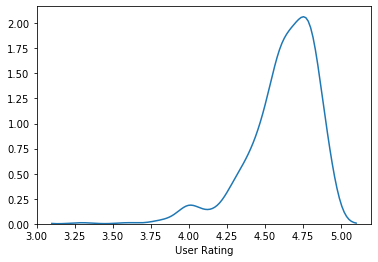

In [84]:
sns.distplot(books['User Rating'], hist = False)
plt.show()

We have a left skewed data set for User Ratings

In [83]:
import scipy.stats as stats
from scipy.stats import shapiro
print("Shapiro t-stat, p-value")
shapiro(books['User Rating'])

#The inference we get is that the data does not follow a normal distribution as the p-value 
#is a lot less that 0.05 reiterating the distplot

Shapiro t-stat, p-value


(0.8718639612197876, 7.478351702190825e-21)

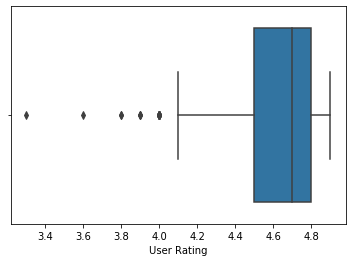

In [85]:
sns.boxplot(books['User Rating'])
plt.show()

In [99]:
q1 = books['User Rating'].quantile(0.25)
q3 = books['User Rating'].quantile(0.75)

print(q1,q3)

IQR = q3-q1
print(IQR)

4.5 4.8
0.2999999999999998


In [100]:
UL = q3 + 1.5*IQR
LL = q1 - 1.5*IQR

print(UL,LL)

5.25 4.050000000000001


In [105]:
books[books['User Rating'] < LL].shape

(21, 7)

In [106]:
books[books['User Rating'] > UL].shape

(0, 7)

We have found that there are more outliers at the lower end of the spectrum in this case user ratings than for top reviews. 

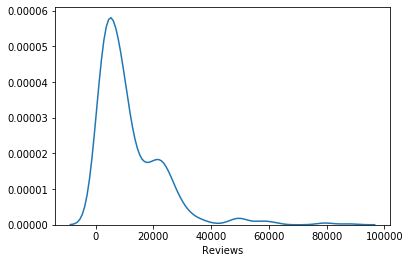

In [108]:
sns.distplot(books['Reviews'], hist = False)
plt.show()

In [111]:
shapiro(books['Reviews'])

#The data is right skewed obviously doesnt have a normal distribution

(0.775259792804718, 8.748081482540166e-27)

In [112]:
q1 = books['Reviews'].quantile(0.25)
q3 = books['Reviews'].quantile(0.75)

print(q1,q3)

IQR = q3-q1
print(IQR)

4058.0 17253.25
13195.25


In [114]:
UL = q3 + 1.5*IQR


print(UL)

37046.125


In [115]:
books[books['User Rating'] > UL].shape

(0, 7)

No outilers detected for book reviews

In [119]:
print("The mean price of a book is :" ,books['Price'].mean())

The mean price of a book is : 13.1
